In [90]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [91]:

# This is the empirical 
def Fe(x, a):
    n = len(a)
    r = 0
    for i in range(n):
        if a[i] > x:
            return r/n
        else:
            r = r + 1 
    return 1.0

In [92]:
def D(a):
    X = np.linspace(0, 100, num=1000)
    T = 100.0
    result = 0
    for x in X:
        if result < abs(Fe(x, a) - x/T):
            result = abs(Fe(x, a) - x/T)
    return result


0.3273273273273274


In [93]:
# See text before example 11b - equation 11.5
def pvalue(iterations, dref, n):
    gt = 0
    for i in range(iterations):
        U = np.random.uniform(0, 1, size=n)
        Usorted = np.sort(U)
        D = np.max([np.max(np.arange(1, n+1)/n - Usorted), np.max(Usorted - np.arange(0, n)/n)])
        if D >= dref:
            gt += 1
    return gt/iterations
pvalue(100000, 0.3277, 18)

0.03261

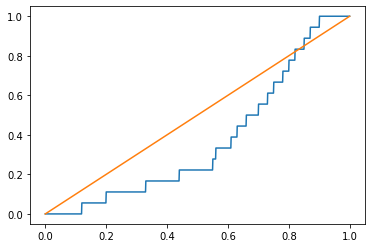

In [95]:
F = [Fe(x, obs) for x in X]
plt.plot(X/100, F)
plt.plot(X/100.0, X/100.0)
plt.show()

In [ ]:
import scipy.stats
obs = [12, 20, 33, 44, 55, 56, 61, 63, 66, 70, 73, 75, 78, 80, 82, 85, 87, 90]
print(D(obs))
scipy.stats.kstest(obs, 'uniform', (0, 100))